### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [122]:
from scipy.fft import rfft, rfftfreq, irfft

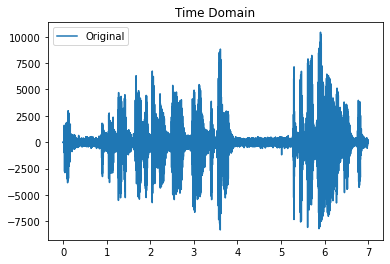

In [123]:
freq, y = wavfile.read('Record_noise.wav')
dt = 1 / freq 
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

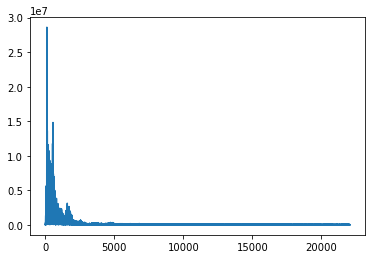

In [124]:
n = len(t)
yf = rfft(y)
xf = rfftfreq(n, dt)

plt.plot(xf, np.abs(yf))


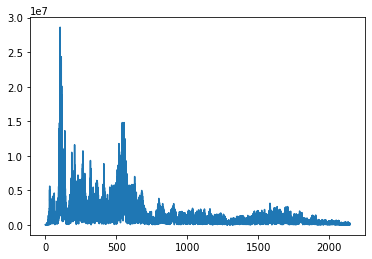

In [125]:
plt.plot(xf[0:15000], np.abs(yf)[0:15000]) #zoom 

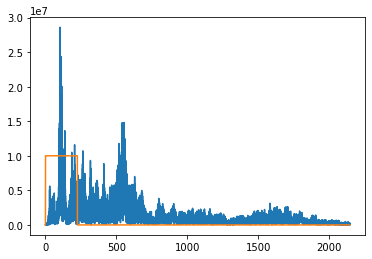

In [126]:
mask1 = np.where(np.logical_and(xf > 0, xf < 225), 1, 0)
plt.plot(xf[0:15000], np.abs(yf)[0:15000])
plt.plot(xf[0:15000], mask1[0:15000]*1e7)

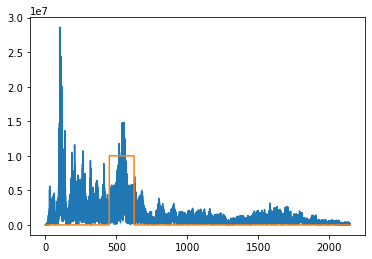

In [127]:
mask2 = np.where(np.logical_and(xf > 450, xf < 625), 1, 0)
plt.plot(xf[0:15000], np.abs(yf)[0:15000])
plt.plot(xf[0:15000], mask2[0:15000]*1e7)

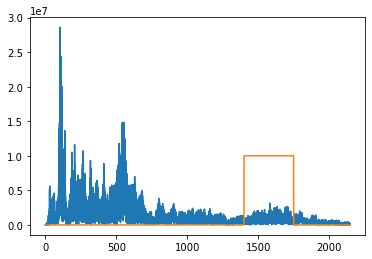

In [128]:
mask3 = np.where(np.logical_and(xf > 1400, xf < 1750), 1, 0)
plt.plot(xf[0:15000], np.abs(yf)[0:15000])
plt.plot(xf[0:15000], mask3[0:15000]*1e7)

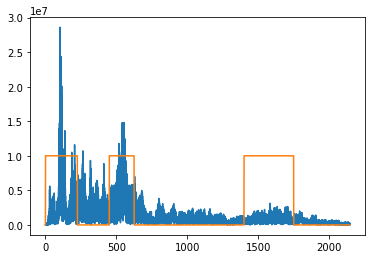

In [129]:
mask = mask1 + mask2 + mask3
plt.plot(xf[0:15000], np.abs(yf)[0:15000])
plt.plot(xf[0:15000], mask[0:15000]*1e7)

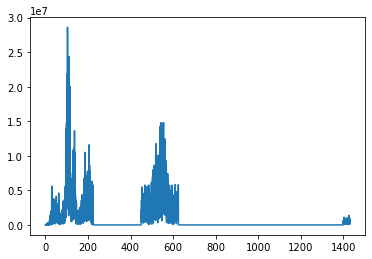

In [130]:
yf_clean = yf * mask
plt.plot(xf[0:10000], np.abs(yf_clean)[0:10000])

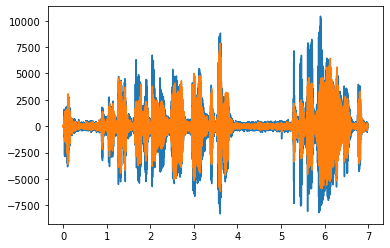

In [131]:
new_f_clean = irfft(yf_clean)
plt.plot(t, y)
plt.plot(t, new_f_clean)

In [132]:
wavfile.write('noise_reduction.wav', freq, np.array(new_f_clean, dtype=np.int16))

In [133]:
new_f_clean

array([-69.96209688, -69.61282358, -69.31770158, ..., -70.49371828,
       -70.49200809, -70.28454018])

Ps.I used the same record with what I record during project demo ( the one I added white noise) because I wanted to have my recording full with noise and I dont know where to record outside so simulate a noise is easier 